# MultiNomialHMM (hidden Markov Model)

MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


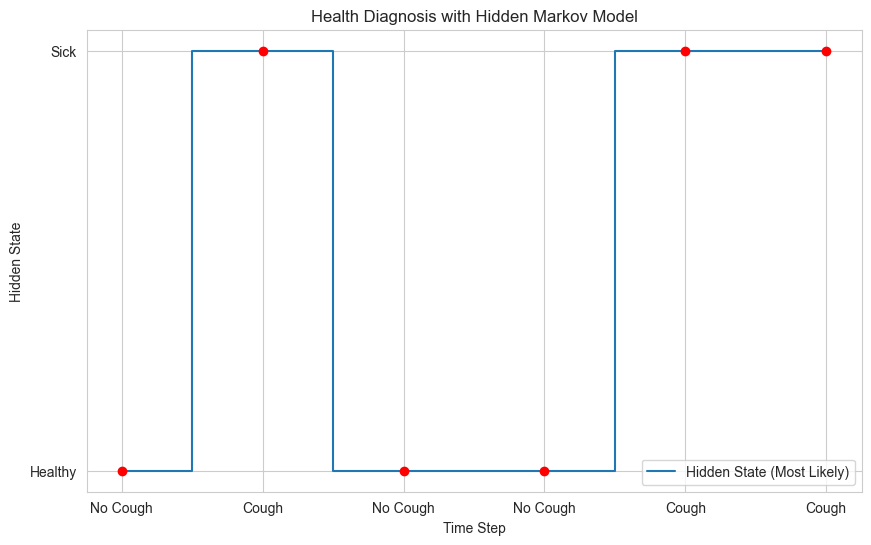

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm

hidden_states = ["Healthy", "Sick"]
observable_states = ["No Cough", "Cough"]

#HMM params
initial_state_probabilities = np.array([0.9, 0.1])
transition_probabilities = np.array([
    [0.8, 0.2],  # Healthy -> Healthy, Sick
    [0.4, 0.6]   # Sick -> Healthy, Sick
])
emission_probabilities = np.array([
    [0.95, 0.05],  # Healthy -> No Cough, Cough
    [0.2, 0.8]    # Sick -> No Cough, Cough
])

# Initialize HMM
hmm_model = hmm.MultinomialHMM(n_components=len(hidden_states), n_iter=100)
hmm_model.startprob_ = initial_state_probabilities
hmm_model.transmat_ = transition_probabilities
hmm_model.emissionprob_ = emission_probabilities
hmm_model.n_trials = 1  # Set the number of trials to 1 for single observations

# Observation sequence in frequency format
# Convert [0] to [1, 0] (No Cough = 1, Cough = 0)
# Convert [1] to [0, 1] (No Cough = 0, Cough = 1)
observation_sequence = np.array([
    [1, 0],  # No Cough
    [0, 1],  # Cough
    [1, 0],  # No Cough
    [1, 0],  # No Cough
    [0, 1],  # Cough
    [0, 1]   # Cough
])

# Predict the most likely sequence of hidden states
predicted_states = hmm_model.predict(observation_sequence)

# Plot the predicted states
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.step(range(len(predicted_states)), predicted_states, where='mid', label="Hidden State (Most Likely)")
plt.scatter(range(len(predicted_states)), predicted_states, color='red', zorder=5)
plt.yticks([0, 1], hidden_states)
plt.xticks(range(len(observation_sequence)), [observable_states[np.argmax(obs)] for obs in observation_sequence])
plt.xlabel("Time Step")
plt.ylabel("Hidden State")
plt.title("Health Diagnosis with Hidden Markov Model")
plt.legend()
plt.grid(True)
plt.show()
